# PyTorch Workflow

## What are we covering ?
1. Data (prepare and load)
2. Build model
3. Fitting the model to data(Training)
4. Making Predictions and evaluating a model(Inference)
5. Saving and loading a model
6. Putting it all together

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__ # need atleas 1.10.0

'2.4.0+cu121'

# 1. Data (Preparing and Loading)

Data can be almost anything ... in machine learning

* Excel spreadsheet
* images og any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of 2 parts
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

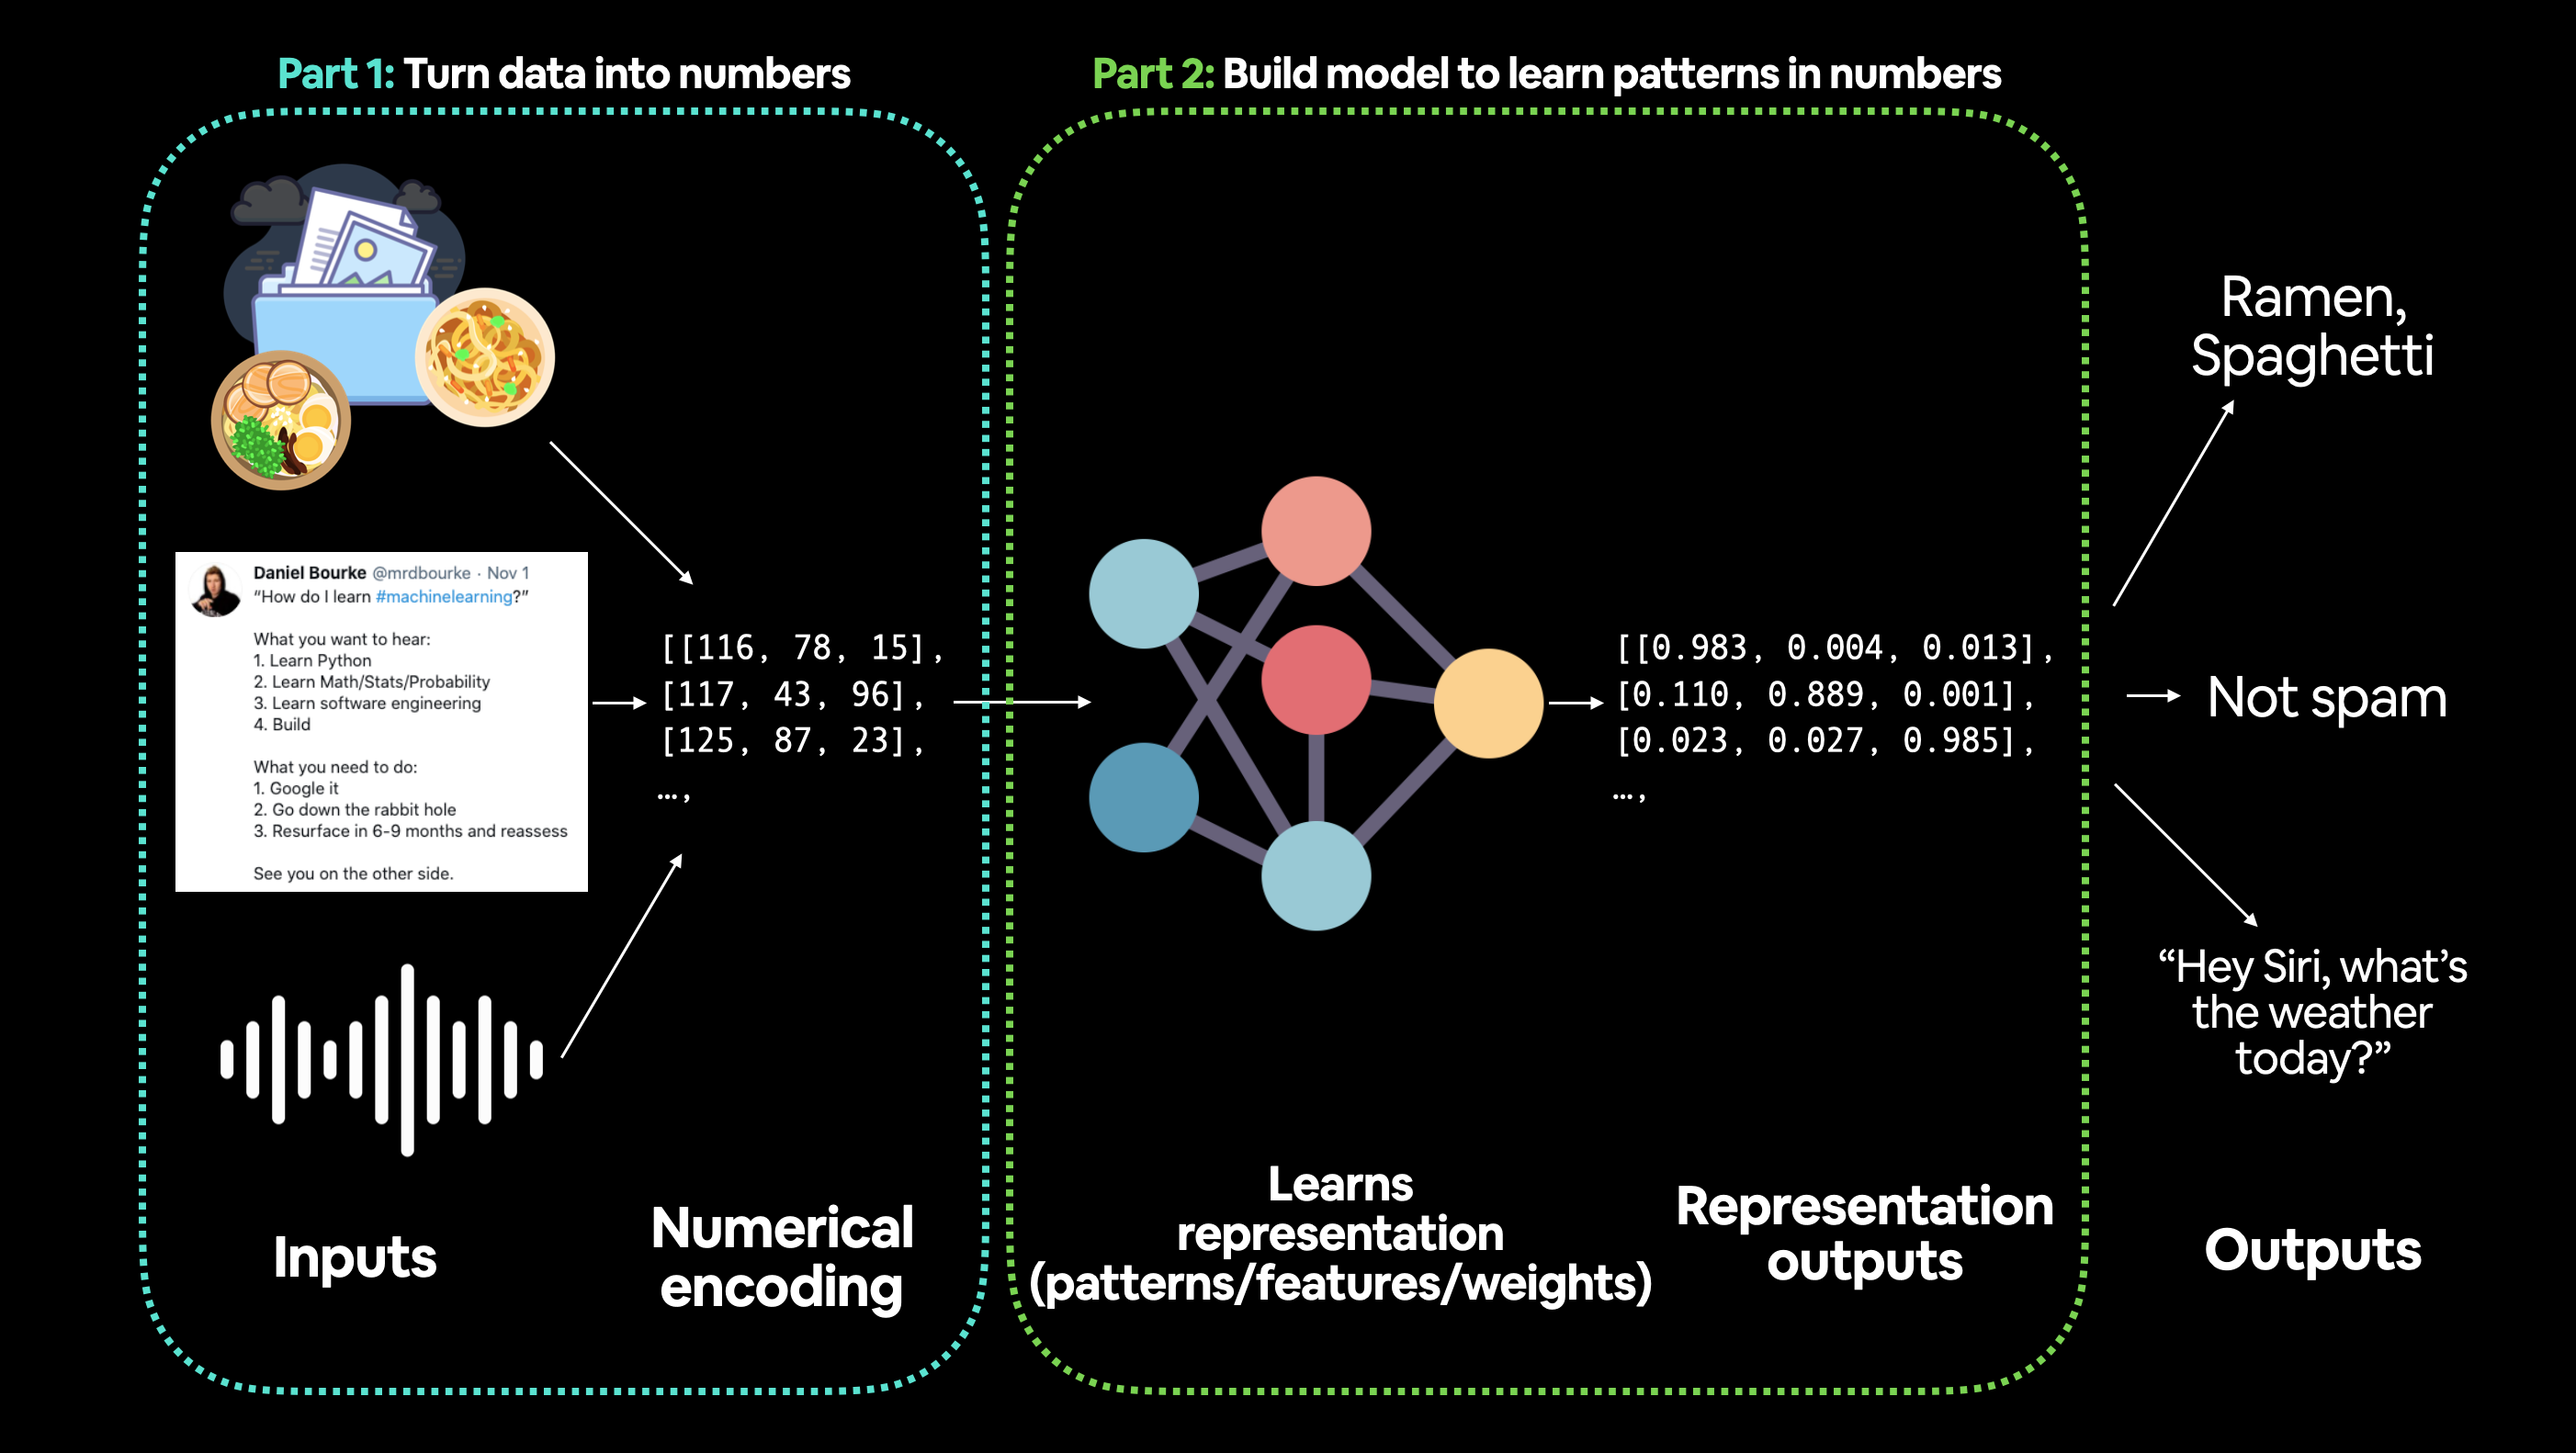

To showcase this , let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a stright line with *known* parameters.

In [ ]:
# Create known parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # unsqueeze() adds an extra dimension, this is needed for operations done later
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

We'll build a model which learns the y values based on the X values , of course we know that the relation between the X and y is linear because we coded it that way, but we won't know this in real time.
The whole premise of machine learning is to know how the input maps to the output.

## Splitting data into Training and Test sets
(one of the most important concepts in ML in general)



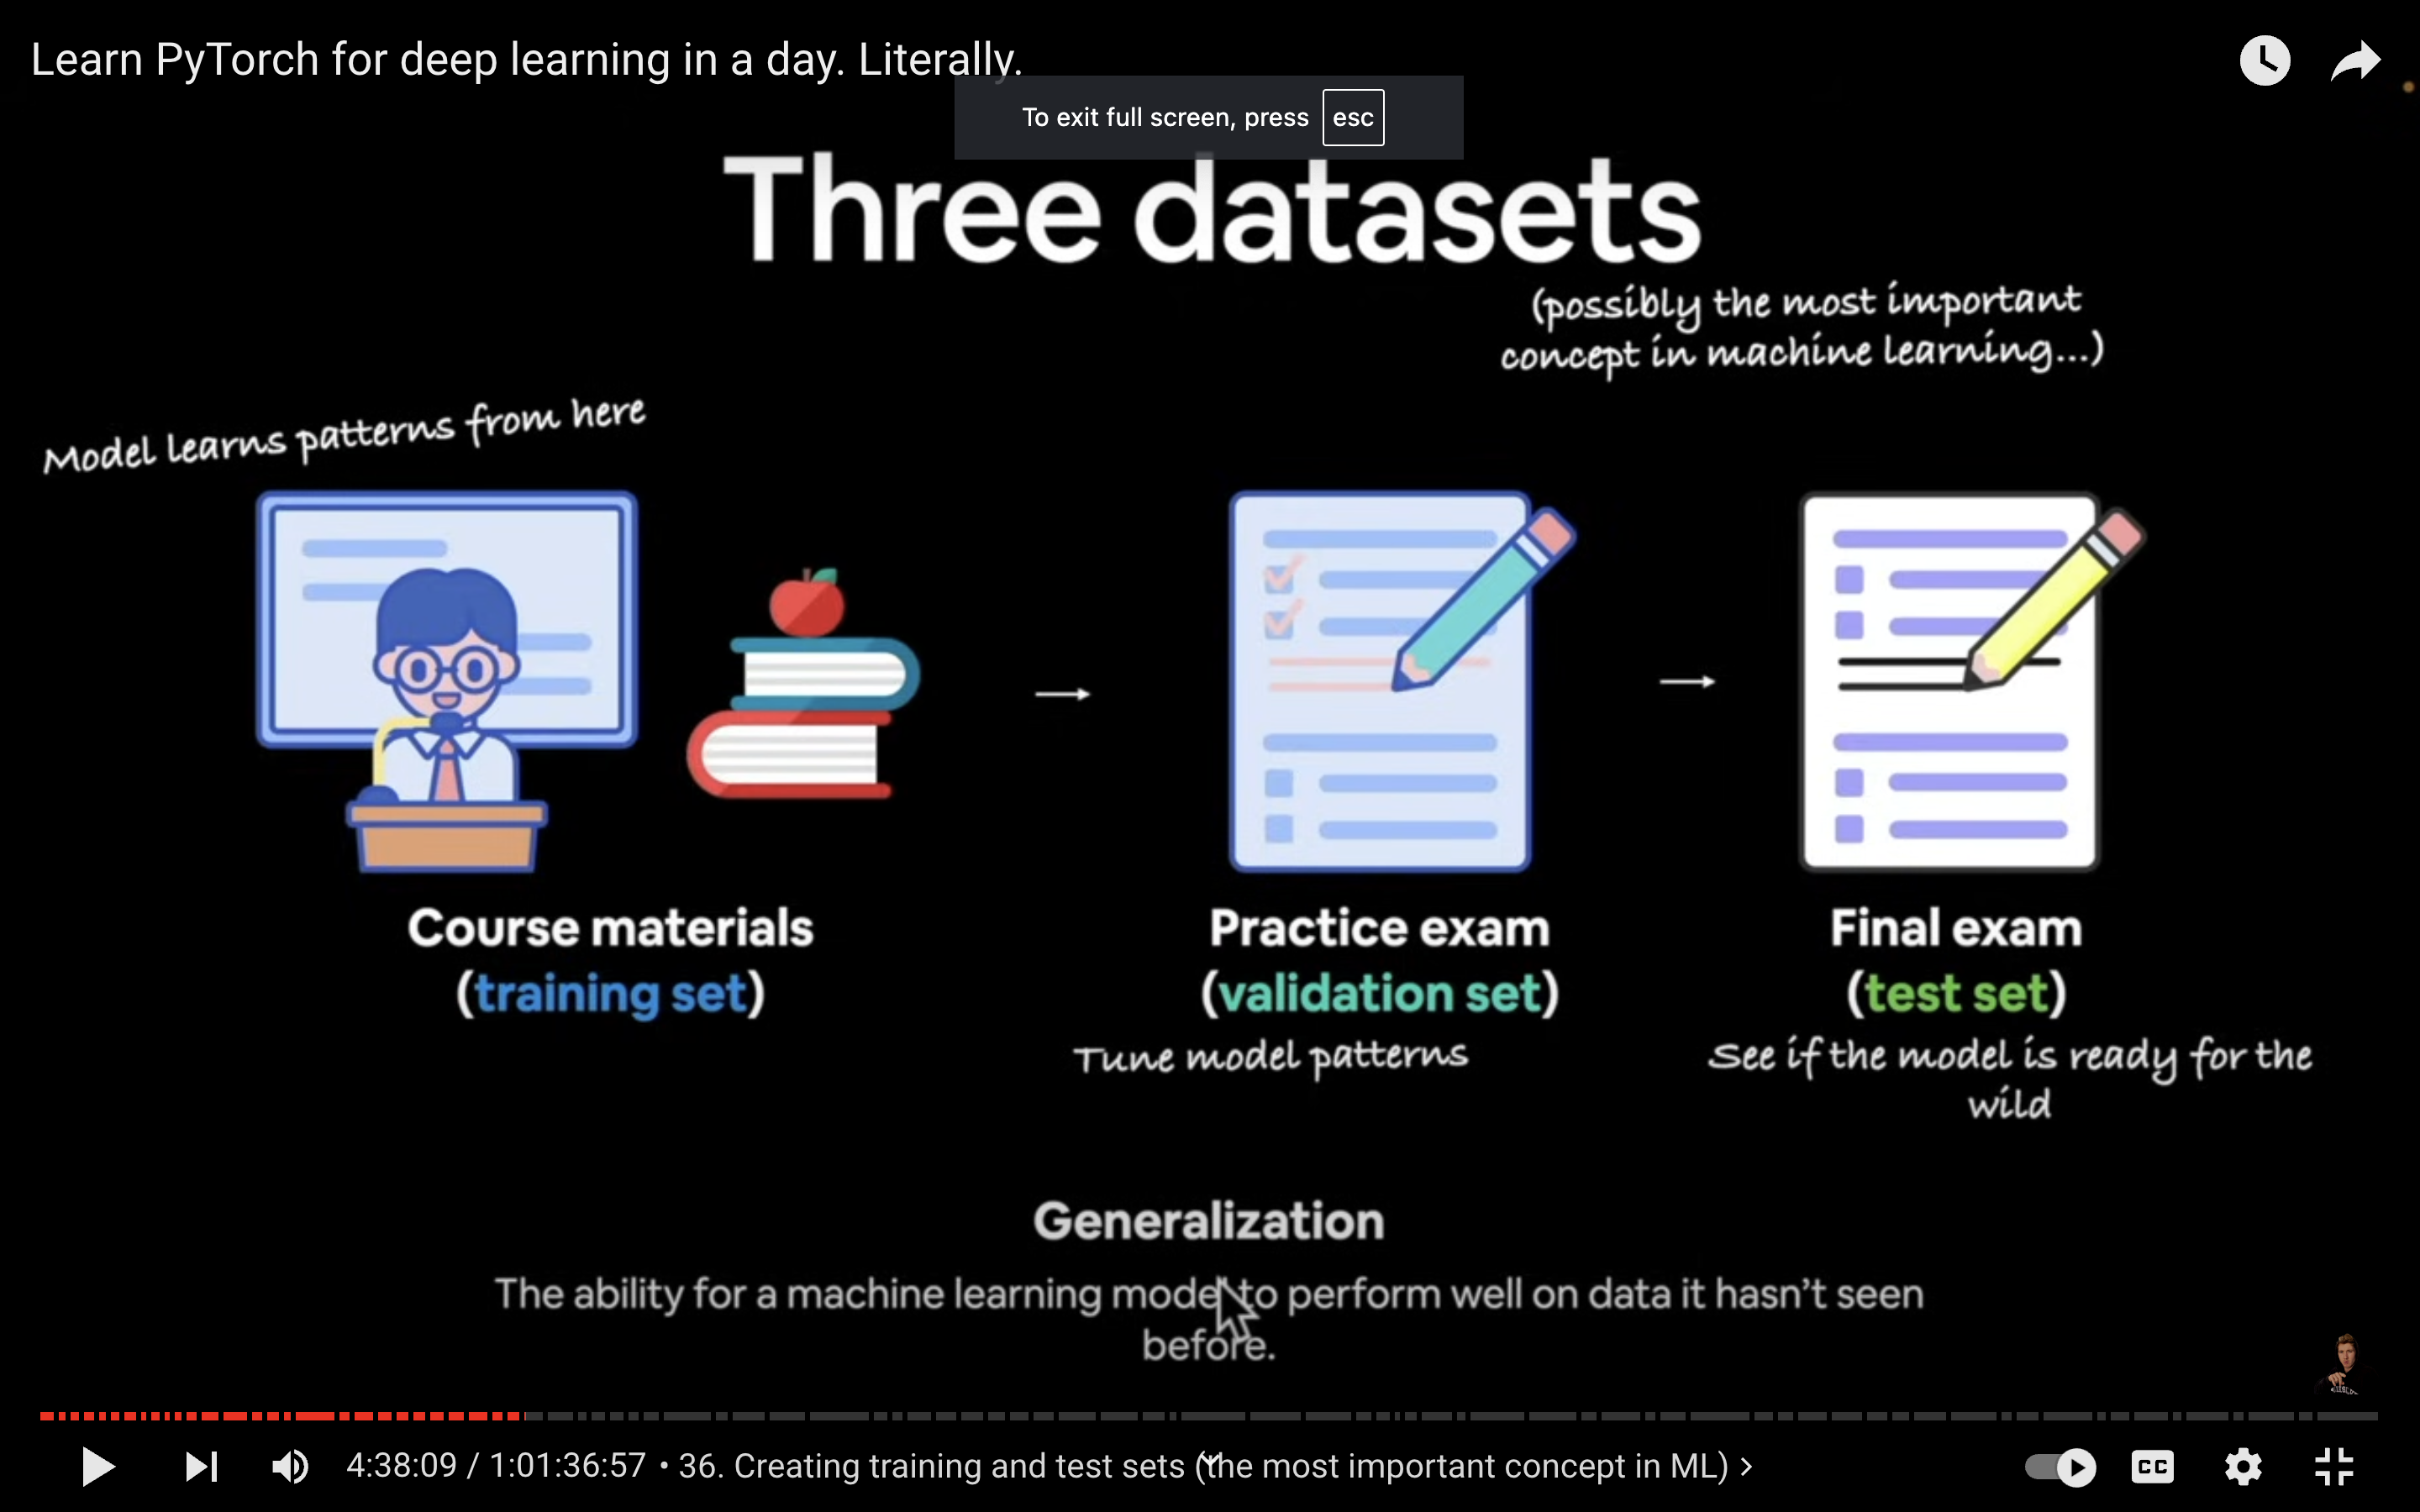



### Create a train / test split

In [ ]:
train_split = int(0.8 * len(X))
train_split

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split: ], y[train_split:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# How might we better visualize our data

This is where the data explorer's motto comes in !
"Visualize , visualize , visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label="Training data")

  # plot test data in green
  # print(len(test_data), len(test_labels))
  plt.scatter(test_data, test_labels, c = "g", s = 4, label="Testing data")

  # Are there predictions ?
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14})
  plt.show()

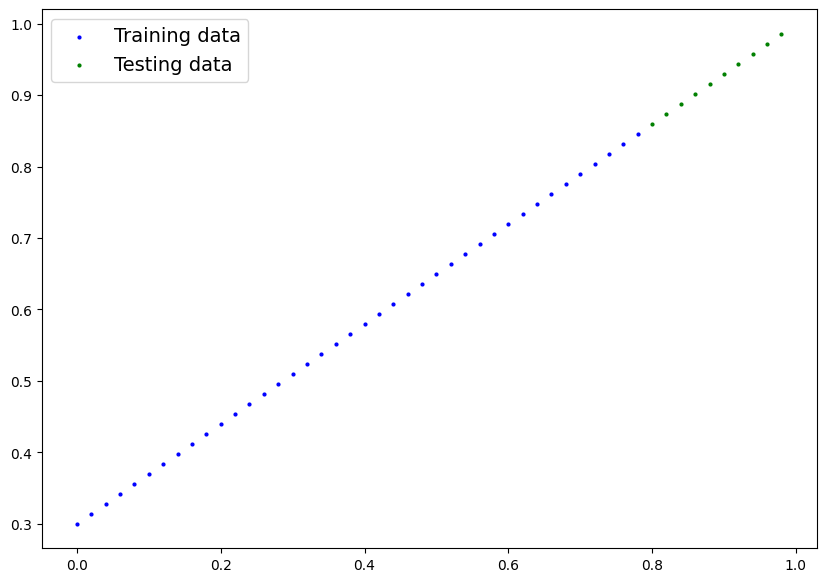

In [ ]:
plot_predictions()

# Building our first PyTorch model

We'll be creatng a linear regression model.
We'll be using classes throught the course , so familiarise yourself with OOP - [OOP in Python](https://realpython.com/python-classes/)

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust random values to better represent (or get closer to) the ideal values (the weight ad bias values we used to create the data)

How does it do so ?
Through two main algorithms:
1. Gradient descent - [Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-w)
2. Backpropagation - [Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

In [ ]:
import torch
from torch import nn

# create linear regression model class
class LinearRegressionModel(nn.Module):
  # This class inherits from nn.Module, almost everything in PyTorch inherits from it
  # nn.Module is like the building blocks of PyTorch models
  # Modules can also contain other modules, theyare kinda like lego blocks, we stack one model on top of another

  # Creating a constructor
  def __init__(self):
    super().__init__()

    # Creating a parameter for the weights
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # for gradient descent, set to "True" by default
                                            dtype=torch.float)) # The data type of the tensor

    # Creating a parameter for the bias
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # this parameter be updated via gradient descent
                                            dtype=torch.float)) # The data type of the tensor


    # The goal of doing this is to initialise the weights and biases to random data and as we train the model ,
    # We'll update the values such that they capture the pattern in the training data.

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # The forward method is defined here. In PyTorch, every model that inherits
    # from nn.Module must override this method to specify how the model processes input data.
    # x: torch.Tensor specifies that the method expects x to be a PyTorch tensor.
    # -> torch.Tensor indicates that the method will return a PyTorch tensor.
    return self.weights * x + self.bias # This is the linear regression formula


Detailed explanation of the above code
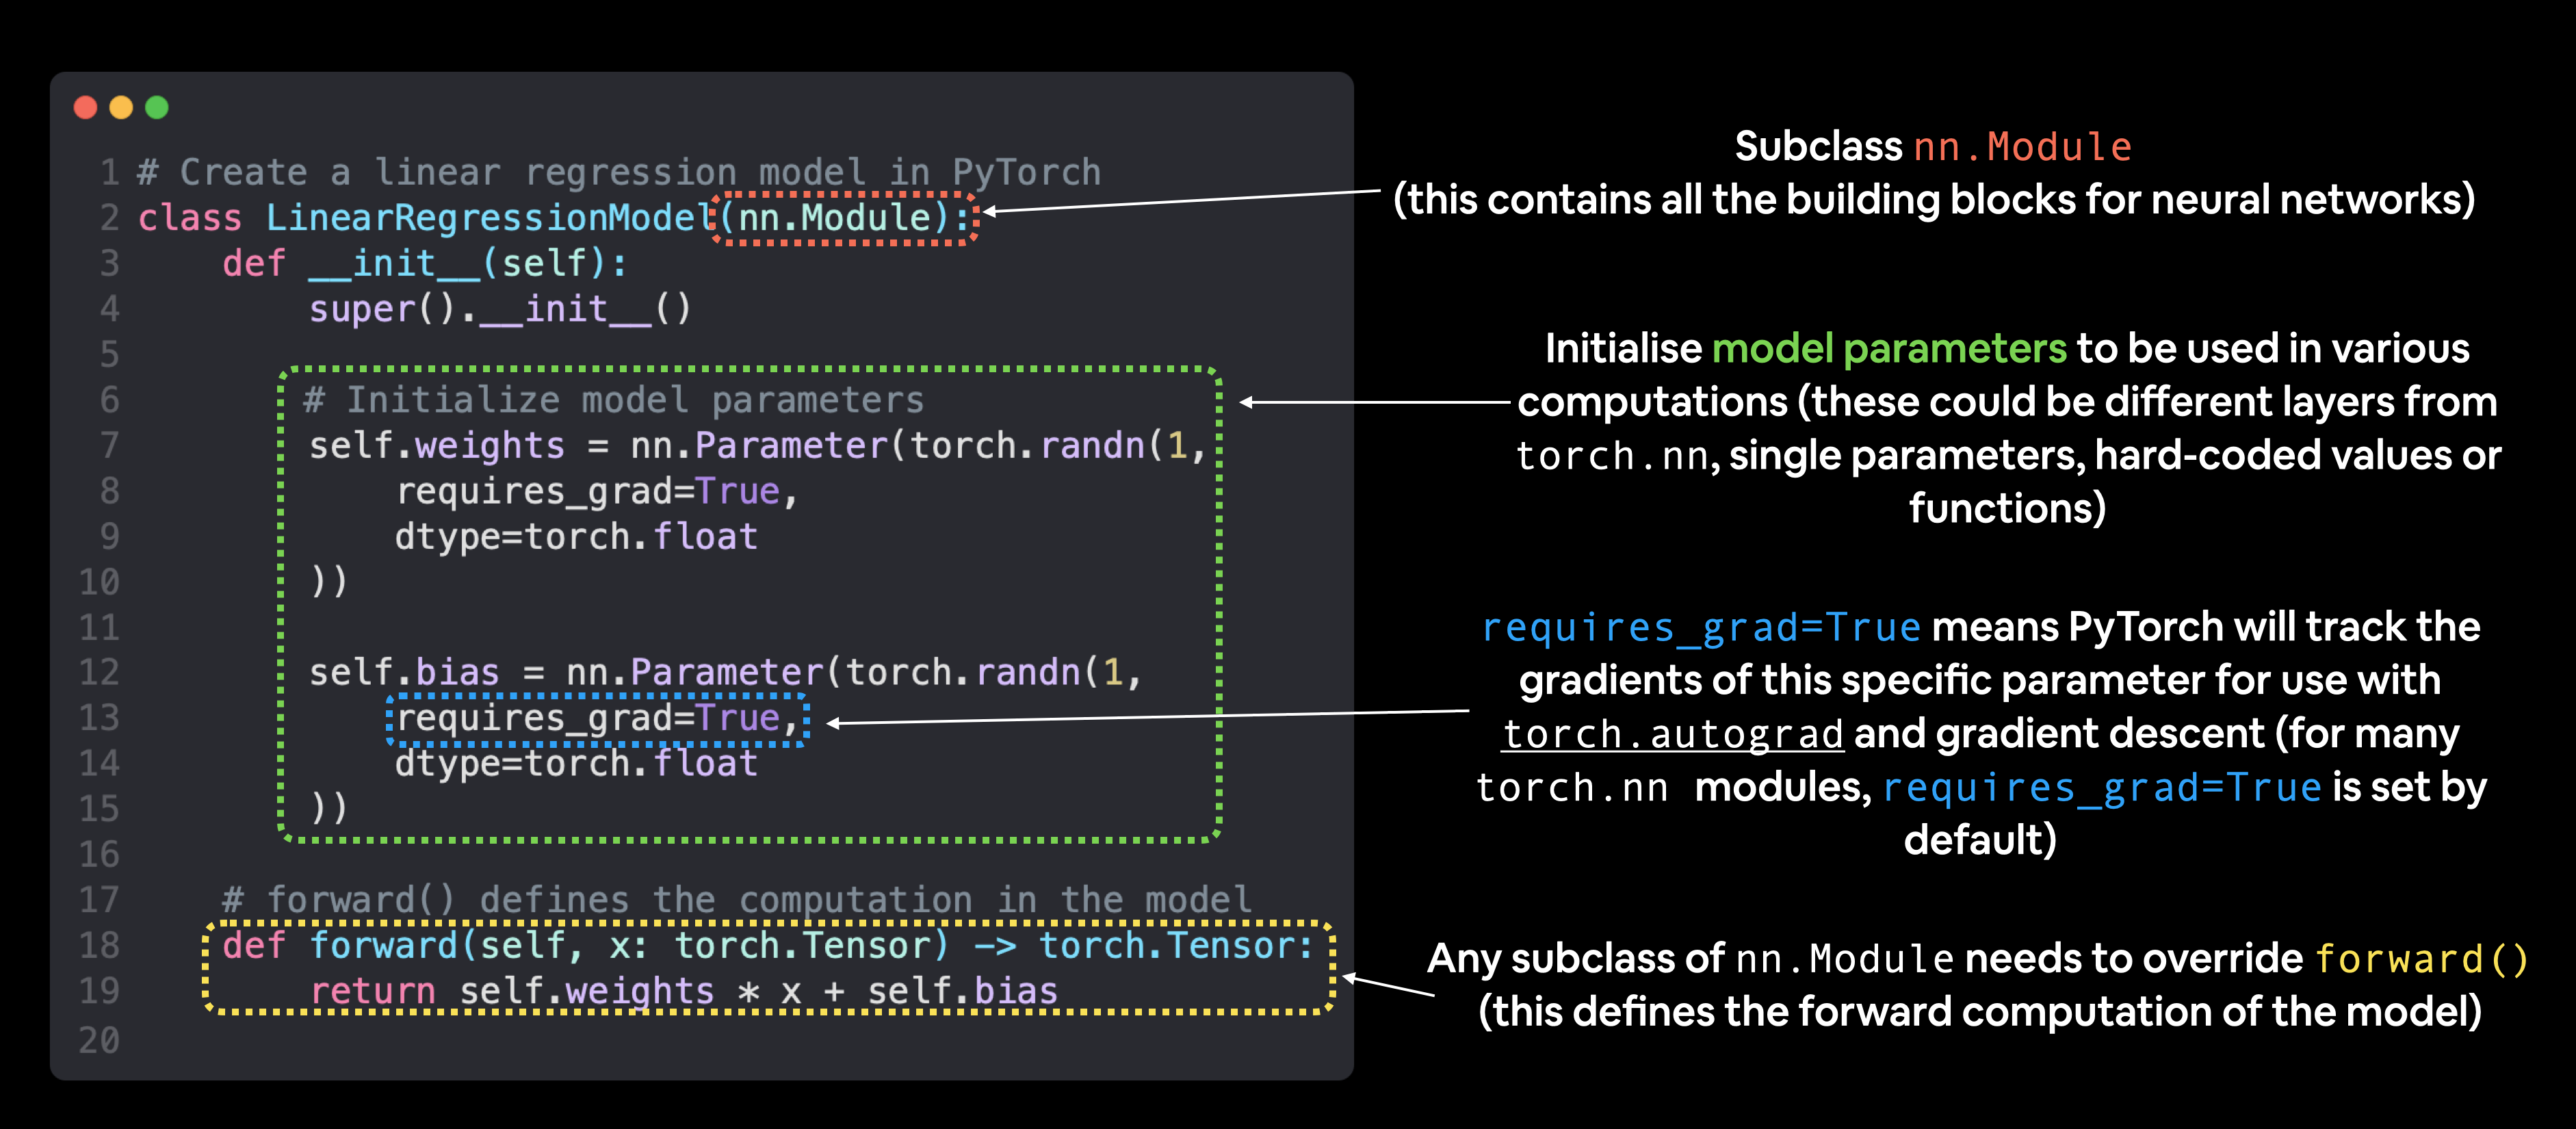

**NOTE** :
1. here we have defined the parameters i.e the weights and biases however , in a real world scenario we need not define the parameters, we'll have to define the layers of our neural network. The weights and biases get updated by the layers.
2. nn.Module , already has a forward method ([nn.Module doc](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)) , hence it is essential to override it as per our requirement.

## PyTorch Model building essentials

1. `torch.nn` -contains all of the building blocks required to build a computational graph ( a neural network is considered a computational graph )
2. `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
3. `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward().
4. `torch.optim` - this is where the optimizers in PyTorch live , they help with gradient descent
* `def forward()` - **all nn.Module subclasses require you to overwrite forward()**, this method defines what happens in the forward computation.

## Checking the contents of our PyTorch models
 Now we have created a model, let's see what's inside ...
 So we ca check our model paraemters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed, earlier we used the rand method , without the random seed which means we'll get different
# set of random values every time , to avoid this we are using random seed

torch.manual_seed(42)

# Create an instance of the model ( this is a sibclass of nn.module )
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# In the above code we get the same random value every time , but when we simply do torch.rand()
# we get a different random value everytime. This is only for understanding.

torch.randn(1)

tensor([0.2345])

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# In our case we already know what the ideal values are, we start off with random values for the weights and biases
# and then train our model such that we obtain values closest to the ideal values. The ideals are shown below.

weight, bias

(0.7, 0.3)

## Making Predictions using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through or model , it's going to run it through the forward() method.

In [ ]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [ ]:
# We can also do
y_preds2 = model_0(X_test)
y_preds2

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

`y_preds = model_0(X_test)`:
1. **Operation**:
The model (model_0) is used to make predictions on the input data X_test.
Since no context manager (torch.inference_mode() or torch.no_grad()) is used, PyTorch will track operations on tensors for automatic differentiation (i.e., it keeps track of gradients).
2. **Use Case**:
This mode is typically used during training when you want to compute gradients to update the model's weights using backpropagation.
3. **Performance**:
It uses more memory and computational resources because it keeps track of the computation graph for gradients.
4. **Result**:
y_preds will hold the predicted values, and you can inspect them by simply typing y_preds.

`torch.inference_mode()`:
1. **Operation**:
The model is used to make predictions on the input data X_test within the torch.inference_mode() context manager.
torch.inference_mode() disables gradient calculation, which is unnecessary during inference (when you're only making predictions, not training the model).
2. **Use Case**:
This mode is ideal for inference (i.e., making predictions on new data) because it saves memory and speeds up computation by disabling gradient tracking.
3. **Performance**:
It is more efficient because it avoids storing intermediate results needed for gradient calculation, which can reduce memory usage and increase inference speed.
4. **Result**:
y_preds will hold the predicted values, and you use print(y_preds) to display them.


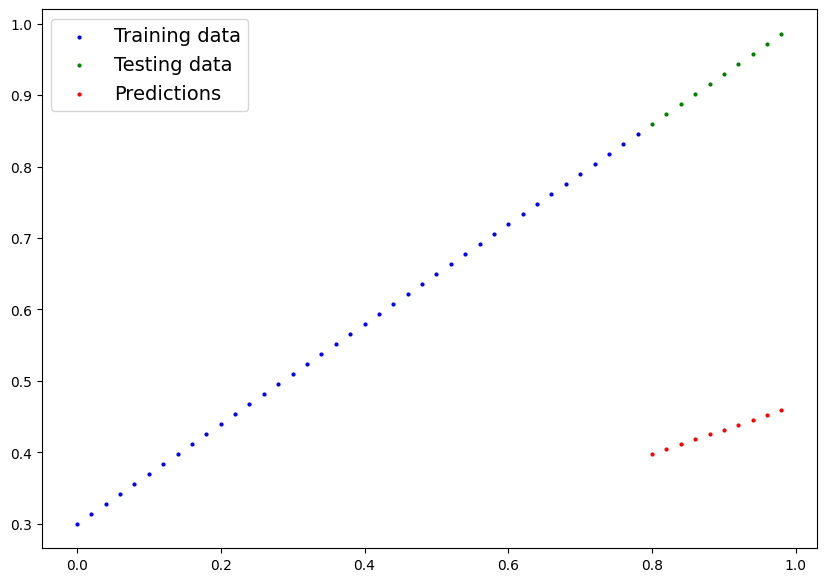

In [ ]:
plot_predictions(predictions=y_preds)

## Training the model

The whole idea of training is to move from some uknown parameters (these may be random) to some known parameters

or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use **loss functions**.

**NOTE** : Loss functions may also be called cost function or criterion in different areas. For our case we're going to refer to it as a loss function


---


**Things we need to train:**
* **Loss Function**: A function to measure how wrong our model's predictions are to the ideal outputs, lower is better.[Pytorch Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

* **Optimizers**: Takes into account the loss of a model and adjusts the model's parameters. (Eg: weight & bias) [PyTorch Optimizers](https://pytorch.org/docs/stable/optim.html)
  * Inside the Ooptimizer you'll often have to set two parameters:
    * `params` - the model parameters you'll like to iptimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/ small the optimizer changes the parameters with each step ( a small `lr` results in small changes, a large `lr` results in small changes).


---


**And specifically in PyTorch, we need:**
1. Training loop
2. Testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# check out our models parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# using L1 / MAE as our loss function
loss_fn = nn.L1Loss()

# Setup SGD optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),  # what parameters need to be optimized by the optimizer
                            lr=0.01) # learning rate = possibly the most important hyperparameter you can set

# The smaller the learning rate the smaller the change in the parameter

**Q**: Which loss function and optimizer should I use ?
**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
For example, for a regression problem (like ours), a loss function os `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
But for classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

## Building a Training loop and a Testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do
1. Forward pass ( this involves data moving through our model's `forward()` fuunctions, there can be mulitple forward functions) to make predictions on data - also called **forward propagation**.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimzer zero grad
4. **BackProgatation** Loss backward - move backwards through the network to calculate the gradients of each parameters of our model with respect to the loss.
5. Optimizer - use the optimizer to adjust our model's parameters to try and improve the loss. - **Gradient Descent**


In [ ]:
# An epoch is one loop through the data ...
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients

  # 1. Forward propagation
  # Forward pass on the training data using the forward() method inside
  y_pred = model_0(X_train)

  # 2. Calculate the loss function
  # Calculate the loss (how different are the models predictions to the true values)
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  # Zero the gradients of the optimizer ( gradients accumulate over time i.e in each epoch,hence we set it to zero in each epoch )
  optimizer.zero_grad() # Why is it done before back propagation

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  # Perform back propagation on the loss function (compute the gradient of every parameter with requires_grad=True)
  # PyTorch calculates the gradients in order to determine the lowest point in the curve , i.e the point where the loss is the least.
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so ... we have to zero them above step 3 in the loop

  ### Test

  # model_0.eval() # Turns off gradient tracking

PyTorch calculates the gradients at each step until it reaches a point in the curve where the value of the loss is minimal. PyTorch does this using `torch.autograd` - [Torch Autograd](https://pytorch.org/docs/stable/autograd.html)

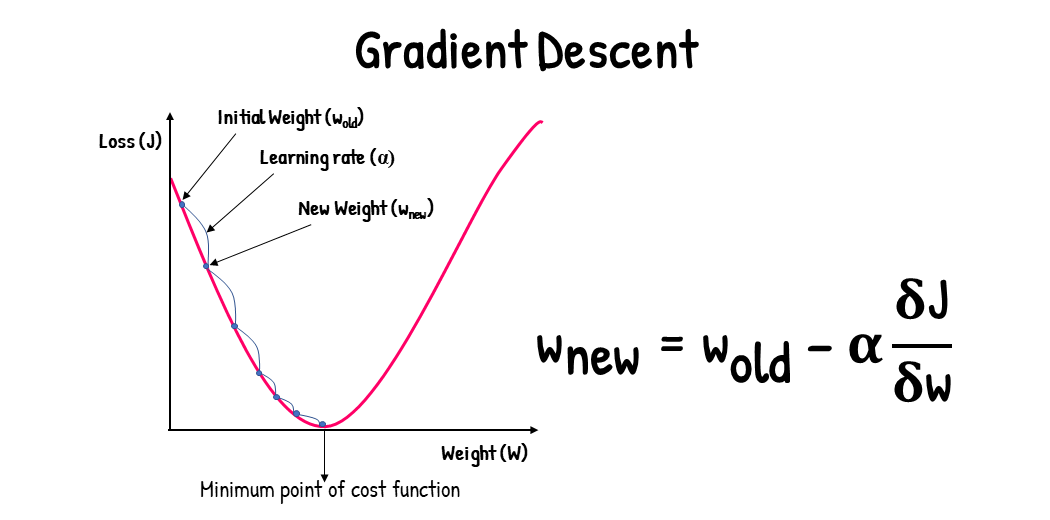

As we get closer and closer to the bottom of the curve (point of convergence) the learning rate decreases , thus we take smaller and smaller steps - Scheduling Learning rate.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

## Make predictions

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

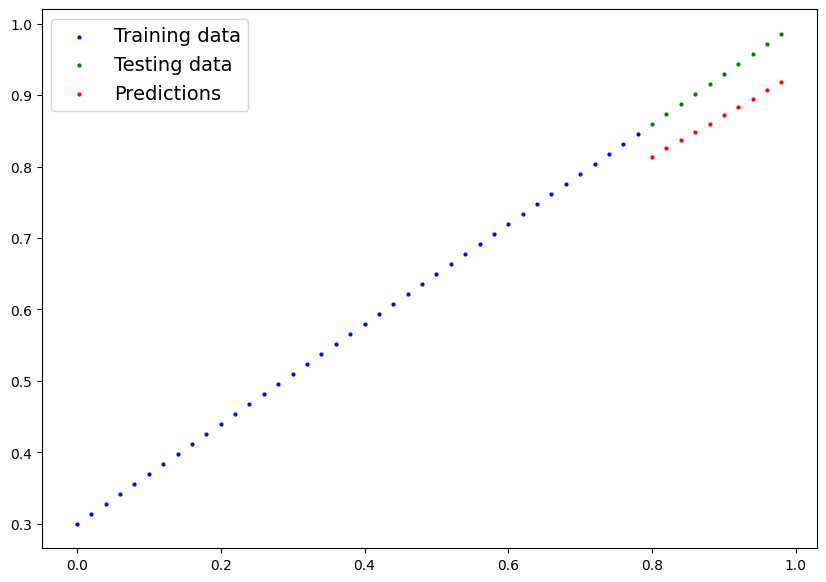

In [ ]:
plot_predictions(predictions=y_preds_new)

## Testing Loop

The testing and training logic can be written in different functions we are doing it together here , but we'll modularise the code better in the upcoming sections. Re-wrote the training loop below , so that the testing part is more readable and easy to understand.

In [ ]:
# An epoch is one loop through the data ...
epochs = 200

# Track different values , so that we can track present experiments to future experiments
epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients

  # 1. Forward propagation
  # Forward pass on the training data using the forward() method inside
  y_pred = model_0(X_train)

  # 2. Calculate the loss function
  # Calculate the loss (how different are the models predictions to the true values)
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  # Zero the gradients of the optimizer ( gradients accumulate over time i.e in each epoch,hence we set it to zero in each epoch )
  optimizer.zero_grad() # Why is it done before back propagation

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  # Perform back propagation on the loss function (compute the gradient of every parameter with requires_grad=True)
  # PyTorch calculates the gradients in order to determine the lowest point in the curve , i.e the point where the loss is the least.
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so ... we have to zero them above step 3 in the loop

  ### Test

  model_0.eval() # Turns off different settings in the model not needed for evaluation / testing  (dropout/batch norm layers) gradient tracking

  with torch.inference_mode(): # Turns off gradient tracking & a couple more things behind the scenes
  #  with torch.no_grad(): # You may also see torch.no_grad() in older PyTorch code , this is slower that inference_mode()
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch : 0 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch : 10 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
Epoch : 20 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3358]))])
Epoch : 30 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
OrderedDict([('weights', tensor([0.6313])), ('bias', tensor([0.3288]))])
Epoch : 40 | Loss: 0.010716589167714119 | Test loss: 0.024059748277068138
OrderedDict([('weights', tensor([0.6485])), ('bias', tensor([0.3218]))])
Epoch : 50 | Loss: 0.0072835334576666355 | Test loss: 0.016474086791276932
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
Epoch : 60 | Loss: 0.0038517764769494534 | Test loss: 0.008201557211577892
OrderedDict([('weights', tensor([0.6826])), ('bi

In [ ]:
import numpy as np
np.array(torch.tensor(train_loss_values).cpu().numpy()), test_loss_values, epoch_count

(array([0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)],
 [0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190])

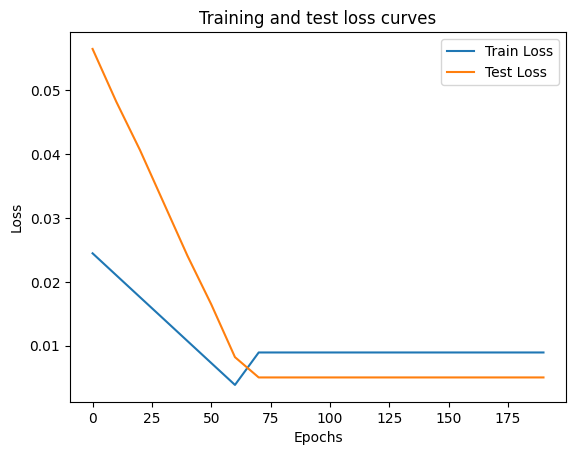

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label="Train Loss") # do this because matplot lib requires a np array as input
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

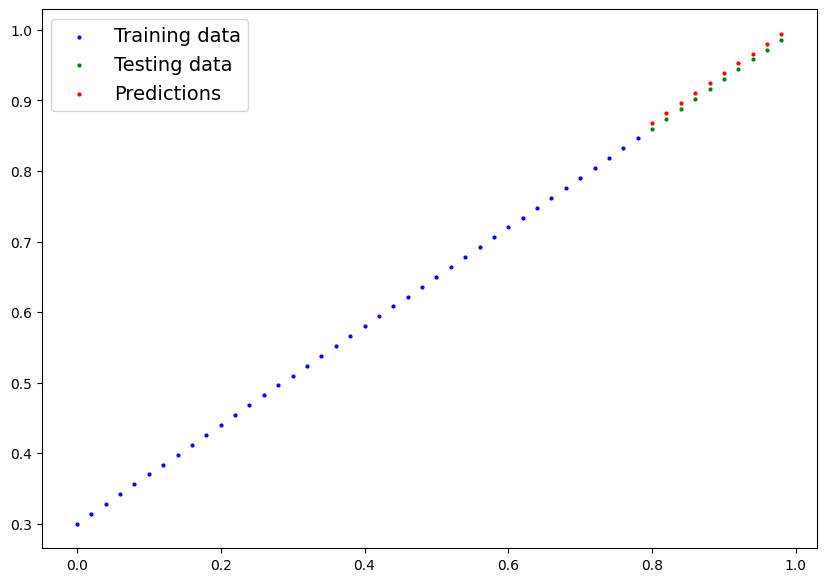

In [ ]:
plot_predictions(predictions=y_preds_new)

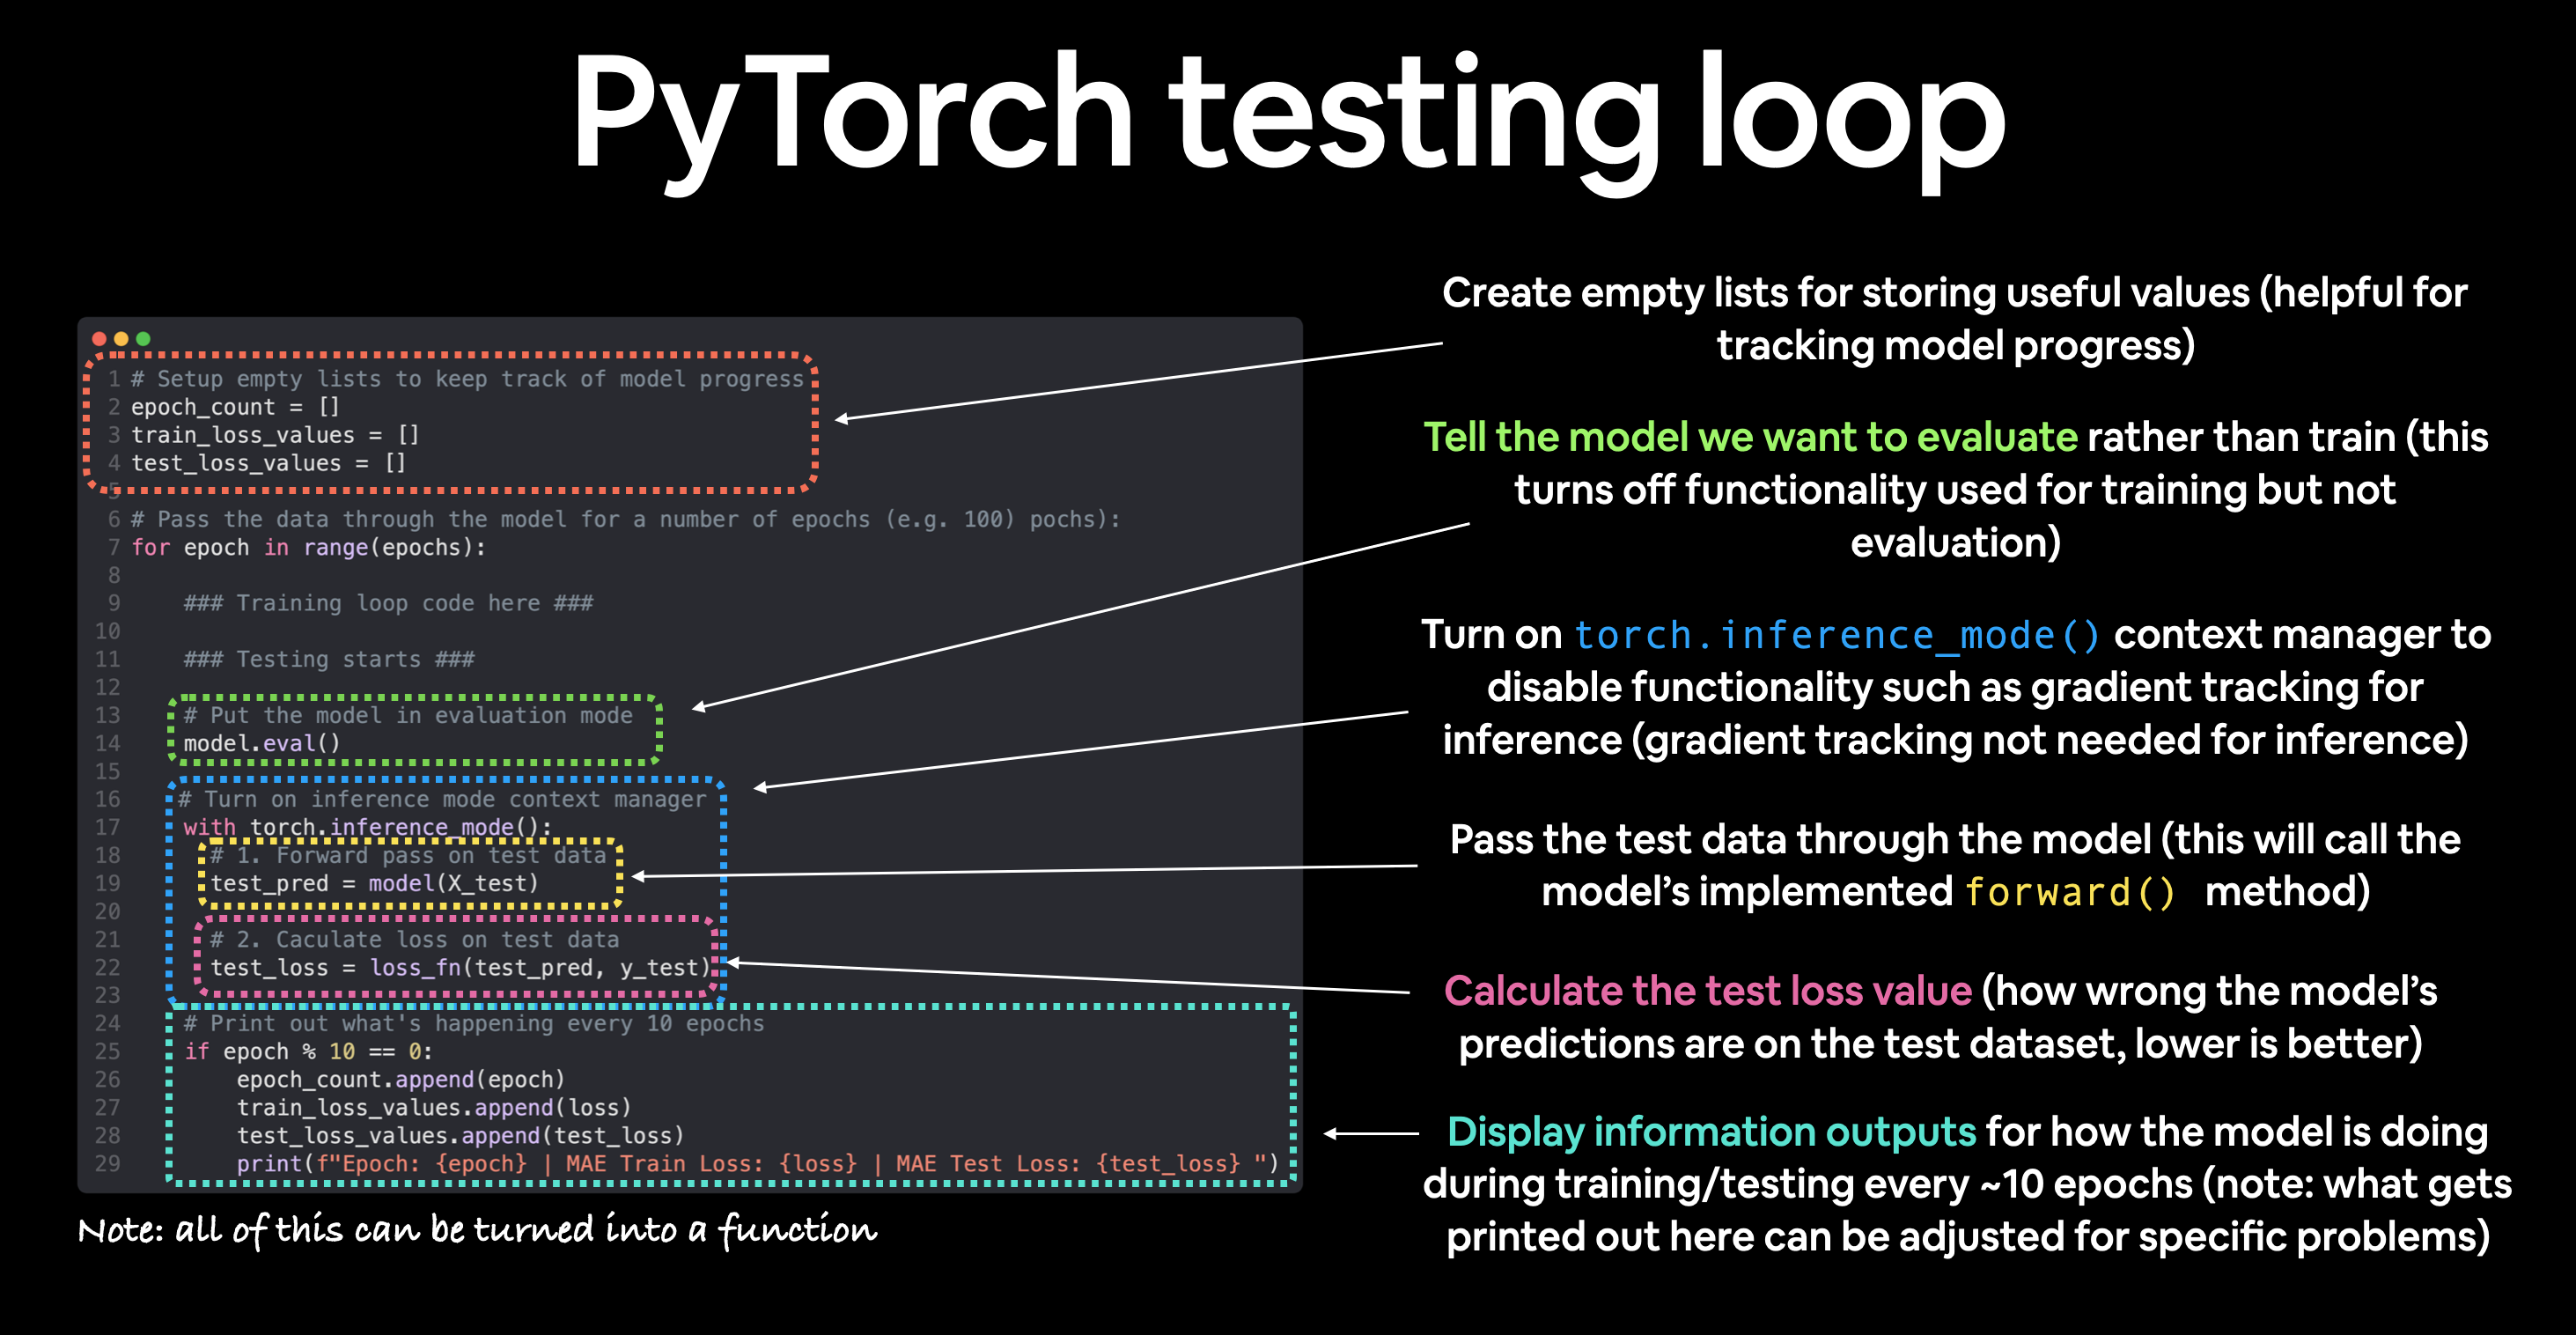

# Saving / Loading a Model

There are three neain methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` -  allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

[About Loading and Saving Models in PyTorch](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

We can save and load the entire model that we create but the recommended way is to save the model state_dict.

## Saving a model in PyTorch

In [ ]:
# Saving our PyTorch Model
from pathlib import Path # Python's module for dealing with file path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # common PyTorch convention is to save models using the extension .pth or .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. sace the models state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


The model is now saved at the path we wanted , we can either download the model directly from here and use it or , we can upload the model to our google drive directly from colab since the folders and files will disappear once the runtime connection is lost on colab.

## Why do we save only the `state_dict` parameters and not the whole model ?

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Sep  1 12:26 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

SInce we saved our models `state_dict()` rather than the entire model , we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [ ]:
# To Load in a save state dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (This will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-254-d00c3c7fe959>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

1. **Instantiate a New Model Instance:**
   ```python
   loaded_model_0 = LinearRegressionModel()
   ```
   Here, `LinearRegressionModel()` is presumably a class that defines your linear regression model. When you instantiate `loaded_model_0`, you're creating a new instance of this model class. At this point, `loaded_model_0` has randomly initialized parameters (weights and biases) typical for a new instance that hasn't been trained.

2. **Load the Saved State Dictionary:**
   ```python
   loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
   ```
   This line loads a saved state dictionary (`state_dict`) into `loaded_model_0`. In PyTorch, the `state_dict` is a Python dictionary object that maps each layer (and possibly each parameter) of a model to its parameter tensor. The `torch.load` function loads this dictionary from a file specified by `MODEL_SAVE_PATH`.

3. **Explanation of `load_state_dict`:**
   - `torch.load(f=MODEL_SAVE_PATH)`: Loads the saved state dictionary from the file path specified by `MODEL_SAVE_PATH`.
   - `loaded_model_0.load_state_dict(...)`: Updates the parameters of `loaded_model_0` with the parameters stored in the `state_dict` loaded from the file. This operation effectively initializes `loaded_model_0` with the exact parameter values (weights and biases) that were saved when the model was previously trained and saved.

**Why Instantiate a New Model Instance?**
- In machine learning frameworks like PyTorch, TensorFlow, or others, when you load a model's state dictionary, you typically instantiate a new instance of the model class first. This is because the state dictionary only contains the learned parameters, not the entire model structure or initialization state. By creating a new instance and then loading the state dictionary into it, you ensure that your model is properly initialized and ready to use with the correct learned parameters.

**Summary:**
- The combination of creating a new instance (`loaded_model_0`) and then loading the state dictionary ensures that your model is initialized correctly with previously learned parameters. This process is crucial for deploying trained models or continuing training from a previously saved checkpoint.

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predcitions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds , to check if the loaded model and the original model are the same
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together
Let's go back through the steps above and see it all in one place

In [ ]:
# import the required modules
import torch
import matplotlib.pyplot as plt

## 1. **Data**

In [ ]:
# Creating some random data

weight = 0.86
bias = 0.45

start = 1
end = 10
step = 0.1
X = torch.arange(start=1, end=end, step=step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
len(X), len(y)

(90, 90)

## 2. Splitting the data into training and testing set

In [ ]:
train_test_split = int(0.8 * len(X))

X_train = X[:train_test_split]
y_train = y[:train_test_split]

X_test = X[train_test_split:]
y_test = y[train_test_split:]

## 3. Visualise the data

In [ ]:
def visualise(train_data,
              train_labels,
              test_data,
              test_labels,
              predictions=None):
  plt.figure(figsize=(8, 5))
  plt.scatter(train_data, train_labels, s = 4,c = 'g',label="Training Data")
  plt.scatter(test_data, test_labels, s = 4, c='b', label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions,s = 4,c='r', label="Predicted Data")
  plt.legend()
  plt.show()

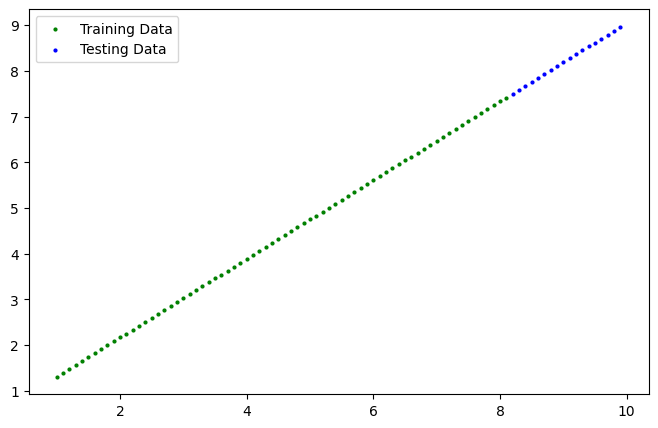

In [ ]:
visualise(X_train, y_train, X_test, y_test)

## 4. Building the model

In [ ]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,
                            requires_grad=True,
                            dtype=torch.float32))

    self.bias = nn.Parameter(torch.randn(1,
                            requires_grad=True,
                            dtype=torch.float32))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

Using PyTorch , to determine the parameters for us , instead of us defining the parameters

In [ ]:
import torch
from torch import nn

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use the nn.Linear() for creating the model parameters / also called : linear transform , probing layer, fully connected layer , dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

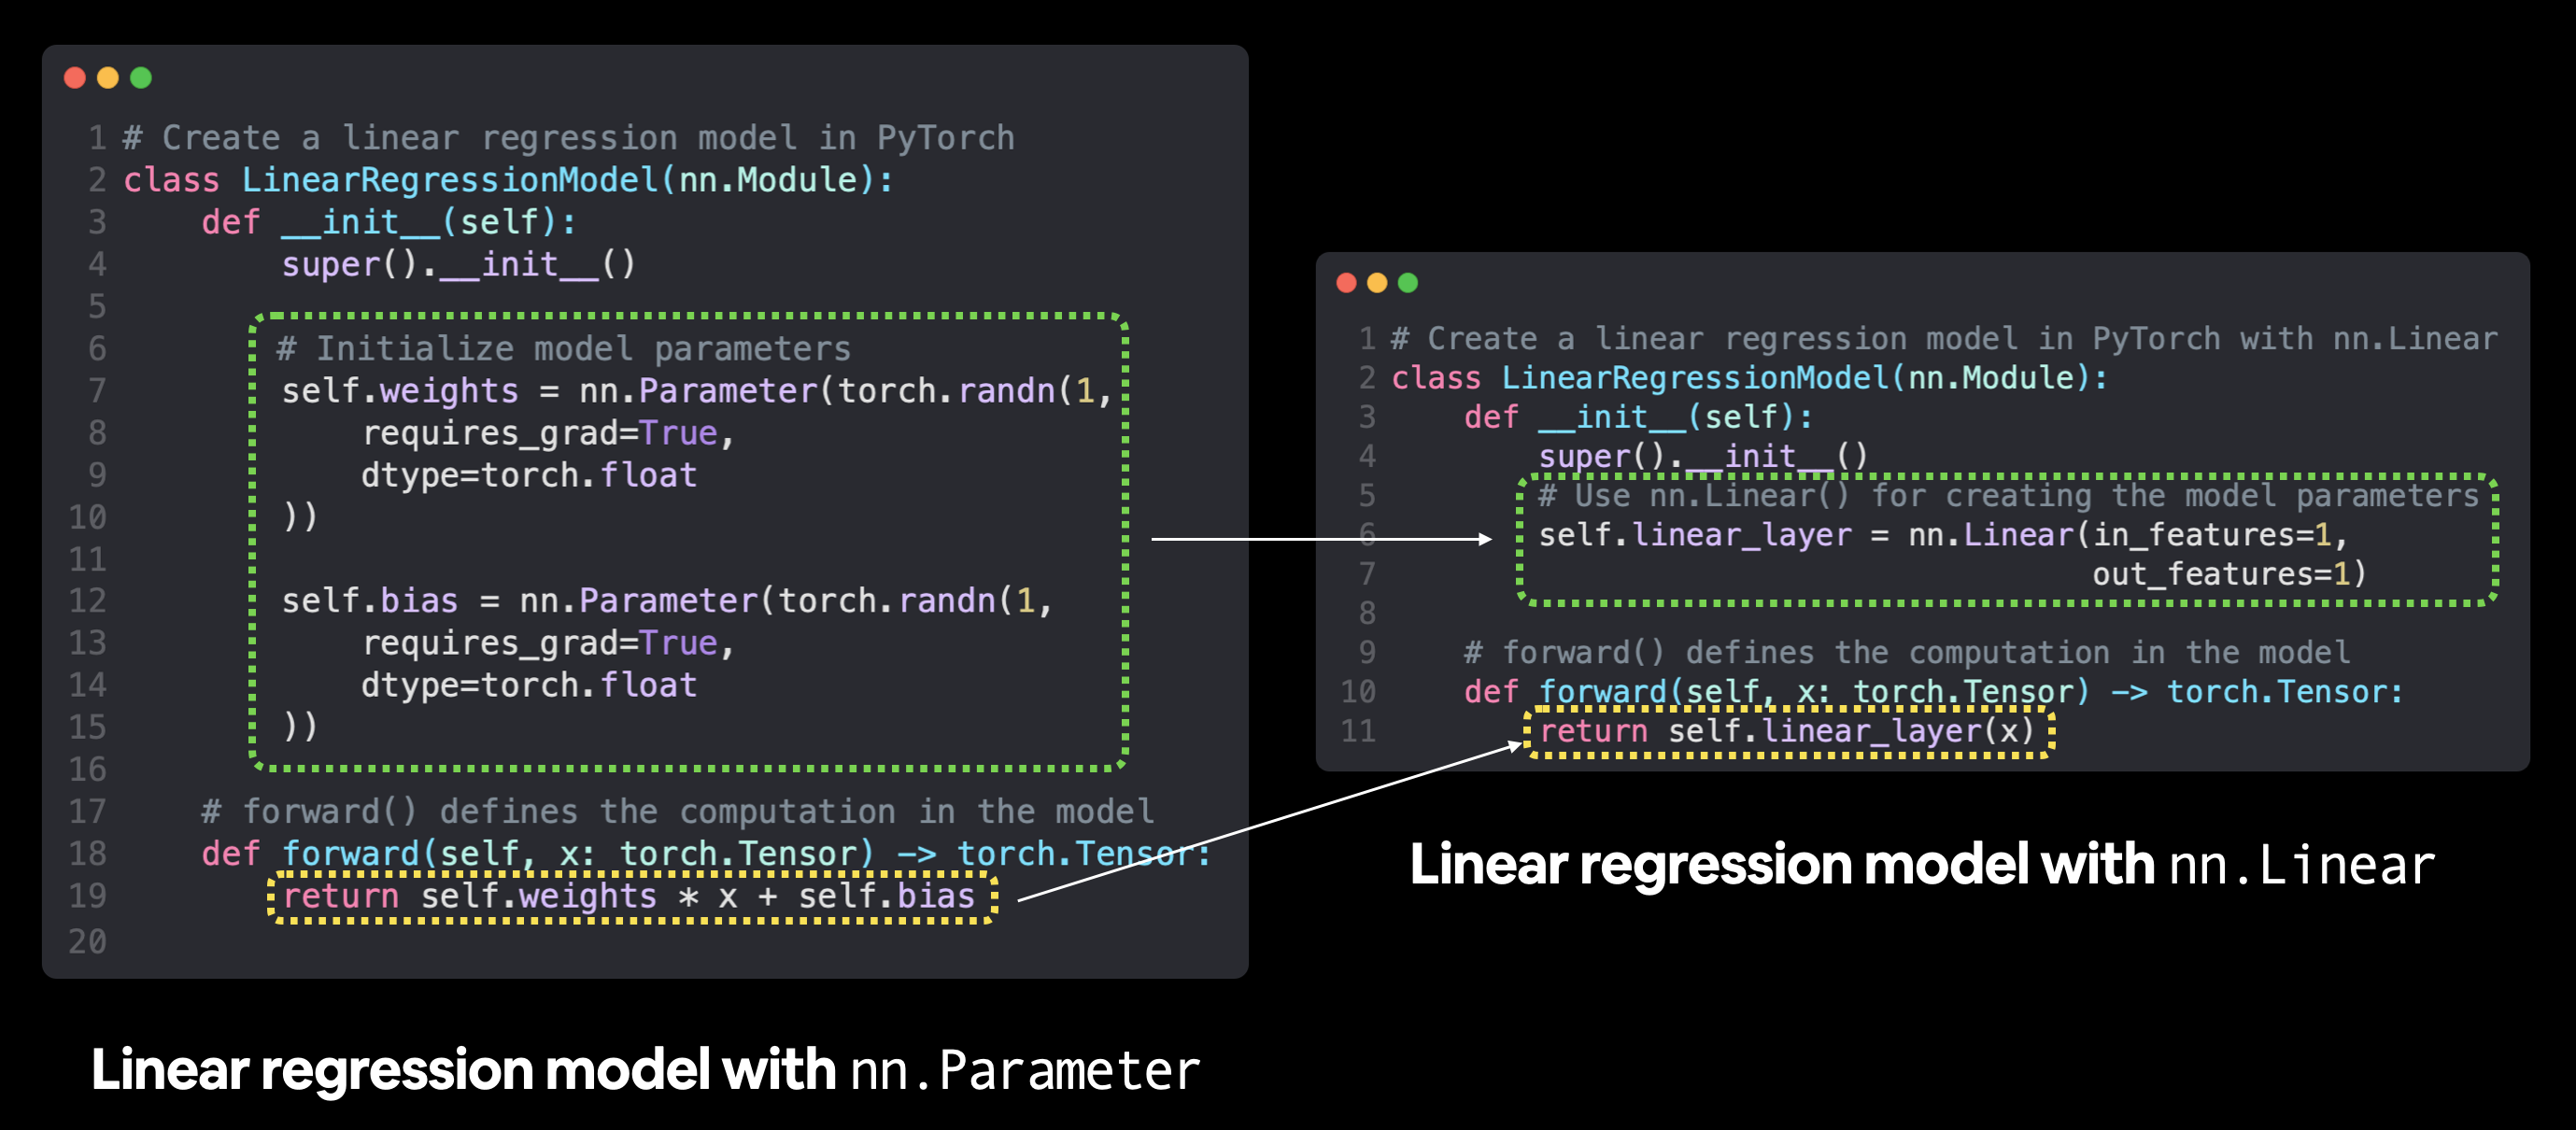

In [ ]:
torch.manual_seed(12022023)
model_1 = LinearRegressionModelV2()
print(list(model_1.parameters()))

[Parameter containing:
tensor([[0.8492]], requires_grad=True), Parameter containing:
tensor([-0.9966], requires_grad=True)]


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8492]])),
             ('linear_layer.bias', tensor([-0.9966]))])

## 5. Writing device Agnostic Code

In [ ]:
# Check the current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device

model_1.to(device='cuda')
next(model_1.parameters()).device

device(type='cuda', index=0)

This line of code is used to check which device (CPU or GPU) a model's parameters are currently stored on in PyTorch. Let's break it down:

1. **`model_1.parameters()`:**
   - This is a method in PyTorch that returns an iterator over all the parameters (weights, biases, etc.) of the model `model_1`.
   - `model_1` is an instance of a PyTorch model class (like `nn.Module`), which contains layers with parameters that can be learned during training.

2. **`next(model_1.parameters())`:**
   - The `next()` function returns the next item from the iterator. In this case, it fetches the first parameter tensor from the model's parameters iterator.
   - This tensor could be the weights of the first layer or any other parameter of the model.

3. **`.device`:**
   - In PyTorch, each tensor has a `device` attribute, which tells you where the tensor is stored—either on the CPU (`torch.device('cpu')`) or on a GPU (`torch.device('cuda')`).
   - By accessing `.device`, you get the device information for the first parameter tensor in `model_1`.

### Example Explanation
- If `model_1` is stored on the CPU, the output of this line might be `device(type='cpu')`.
- If `model_1` is stored on a GPU, the output might be `device(type='cuda', index=0)` (indicating that it's stored on the first GPU).

### Why Use This?
- Knowing the device on which your model's parameters are stored is essential when working with GPUs for acceleration. You often need to ensure that your input data is on the same device as your model to avoid runtime errors.
- This line allows you to quickly check the current device of your model's parameters, which is useful in debugging or ensuring that your model is set up correctly for training or inference.

## 6. Training and Testing the Model

## Training
1. Loss Function
2. Optimizer
3. Training Loop
4. Testing Loop

In [ ]:
from torch.optim import Adam

epochs = 200

epoch_count = []
training_loss = []
testing_loss = []

loss_fn = nn.MSELoss()
optimizer = Adam(list(model_1.parameters()), lr=0.1)

# Put data on the target deive ( device agnostic code for the data )
X_train = X_train.to("cuda")
y_train = y_train.to("cuda")
X_test = X_test.to("cuda")
y_test = y_test.to("cuda")

for epoch in range(epochs):
  # Training loop
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing loop
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 ==0:
    epoch_count.append(epoch)
    training_loss.append(loss)
    testing_loss.append(test_loss)
    print(f"Epoch : {epoch} | Training Loss : {loss} | Test Loss : {test_loss}")
    print(model_1.state_dict())
    print()

Epoch : 0 | Training Loss : 2.237412691116333 | Test Loss : 0.29280588030815125
OrderedDict([('linear_layer.weight', tensor([[0.9492]], device='cuda:0')), ('linear_layer.bias', tensor([-0.8966], device='cuda:0'))])

Epoch : 10 | Training Loss : 0.19527356326580048 | Test Loss : 0.2151772677898407
OrderedDict([('linear_layer.weight', tensor([[1.0268]], device='cuda:0')), ('linear_layer.bias', tensor([-0.6037], device='cuda:0'))])

Epoch : 20 | Training Loss : 0.12338743358850479 | Test Loss : 0.8250451683998108
OrderedDict([('linear_layer.weight', tensor([[1.0407]], device='cuda:0')), ('linear_layer.bias', tensor([-0.2821], device='cuda:0'))])

Epoch : 30 | Training Loss : 0.07600893825292587 | Test Loss : 0.0020187736954540014
OrderedDict([('linear_layer.weight', tensor([[0.9234]], device='cuda:0')), ('linear_layer.bias', tensor([-0.0930], device='cuda:0'))])

Epoch : 40 | Training Loss : 0.034165456891059875 | Test Loss : 0.16199150681495667
OrderedDict([('linear_layer.weight', tensor

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8600]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4500], device='cuda:0'))])

## Making and Evaluating Predictions

In [ ]:
with torch.inference_mode():
  pred_data = model_1(X_test)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8600]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4500], device='cuda:0'))])

We will run into an error if we try to visualise tensor data in matplotlib because, matplotlib only supports numpy arrays which is "cpu" based. Hence we need to convert the device associated with the tensors to cpu

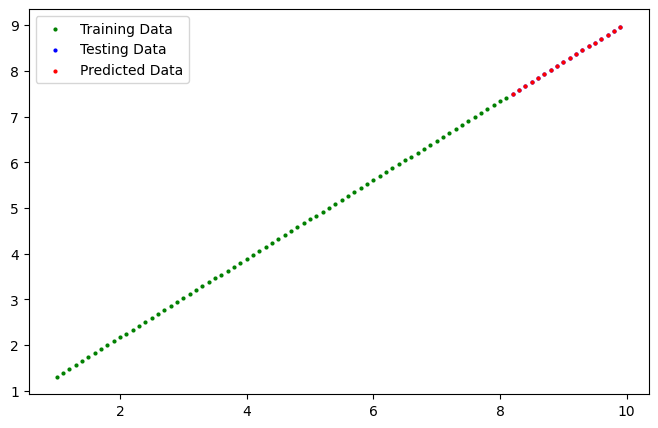

In [ ]:
visualise(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), pred_data.cpu())

## 7. Visualising Training and Testing loss

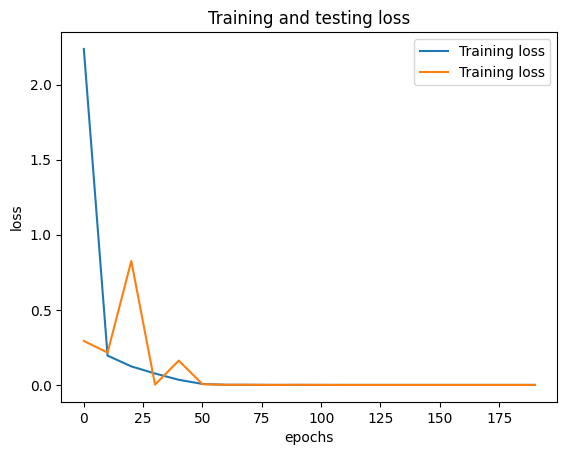

In [ ]:
import numpy as np

plt.plot(epoch_count, np.array(torch.Tensor(training_loss)), label="Training loss")
plt.plot(epoch_count, np.array(torch.Tensor(testing_loss)), label="Training loss")
plt.title("Training and testing loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## 8. Save the model

In [ ]:
from pathlib import Path

def saveModel(modelPath , modelName):
  MODEL_PATH = Path(modelPath)
  MODEL_PATH.mkdir(parents=True , exist_ok=True)

  MODEL_NAME = modelName
  MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

  print(f"Saving model to: {MODEL_SAVE_PATH}")
  torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
saveModel("models", "01_Pytorch_Funda_Recap.pth")

Saving model to: models/01_Pytorch_Funda_Recap.pth


# Commonly used PyTorch Modules

1. Data (prepare and load) - `torchvision.transforms`, `torch.utils.data.Dataset `, `torch.utils.data.DataLoader`
2. Build model - `torch.nn`, `torch.nn.Module`, `torchvision.models`
To optimize the algorithm - `torch.optim`
3. Fitting the model to data(Training)
4. Making Predictions and evaluating a model(Inference) - `torchmetric`
5. Improve through experimentation - `torch.utils.tensorboard`
6. Saving and reload your trained model